In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import VotingClassifier

In [2]:
file_path = "NFLX.csv"

data_frame = pd.read_csv(file_path)

In [3]:
data_frame

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [6]:
## Cleaning the data of missing values
data_frame.dropna(inplace=True)

In [7]:
## Storing the stock movement (up or down) for data analysis
data_frame['Trend'] = (data_frame['Close']-data_frame['Open']).apply(lambda x: 1 if x>0 else 0)

In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
 7   Trend      1009 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 63.2+ KB


In [9]:
data_frame.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Trend
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,1
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,0
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,1
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,1
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000,1
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700,1
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400,0


In [10]:
## List of features to be used for the model
data_features = ['Open', 'Close', 'High', 'Low','Volume']

## Extracting input features(X) and target variable(y)
X = data_frame[data_features]
y= data_frame['Trend']

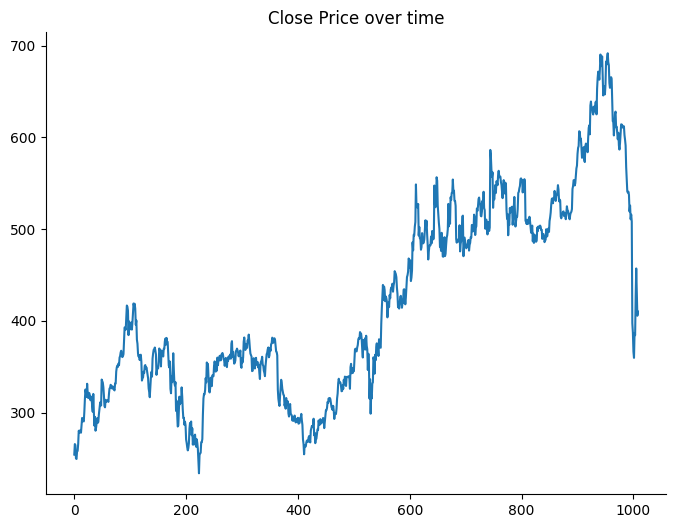

In [11]:
## PLotting the data
X['Close'].plot(kind='line', figsize=(8,6), title='Close Price over time')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Splitting the data into training data and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [15]:
from sklearn.preprocessing import StandardScaler
import joblib

#Initializing the StandardScaler
standard_scaler = StandardScaler()

## Scaling and transforming the training data using StandardScaler
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

#Saving the scaler
joblib.dump(standard_scaler,'scaler.pkl')

['scaler.pkl']